In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#Loading the dataset

data = pd.read_excel('Data.xlsx')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [3]:
#Findings on sturcture of data

data.shape

(303, 14)

In [4]:
#Information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Findings on missing values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Findings on duplicate values

data.duplicated().sum()

1

#### Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [7]:
#Dropping duplicate values and verifying it
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

#### Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [8]:
#Statistical summary of data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.324503,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.588366,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [9]:
#Identifying categorical variables in dataset

data.nunique()

#Assuming variable having upto 5 unique values are categorical i.e sex, cp, fbs, restecg, exang, slope, ca, thal, target

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
target        2
dtype: int64

In [10]:
for i in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    print(data[i].value_counts(),'\n\n')

1    206
0     96
Name: sex, dtype: int64 


0    143
2     86
1     50
3     23
Name: cp, dtype: int64 


0    257
1     45
Name: fbs, dtype: int64 


1    151
0    147
2      4
Name: restecg, dtype: int64 


0    203
1     99
Name: exang, dtype: int64 


2    141
1    140
0     21
Name: slope, dtype: int64 


0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64 


2    166
3    117
1     19
Name: thal, dtype: int64 


1    164
0    138
Name: target, dtype: int64 




<AxesSubplot:xlabel='sex', ylabel='count'>

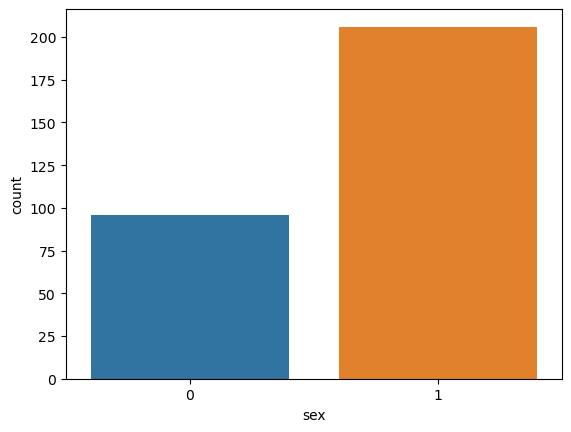

In [11]:
sns.countplot(data['sex'])

<AxesSubplot:xlabel='cp', ylabel='count'>

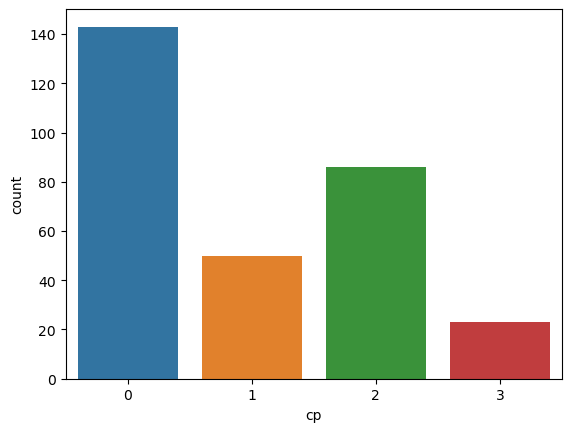

In [12]:
sns.countplot(data['cp'])

<AxesSubplot:xlabel='fbs', ylabel='count'>

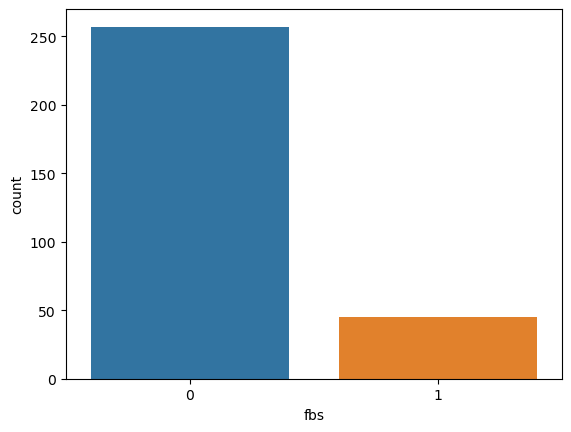

In [13]:
sns.countplot(data['fbs'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

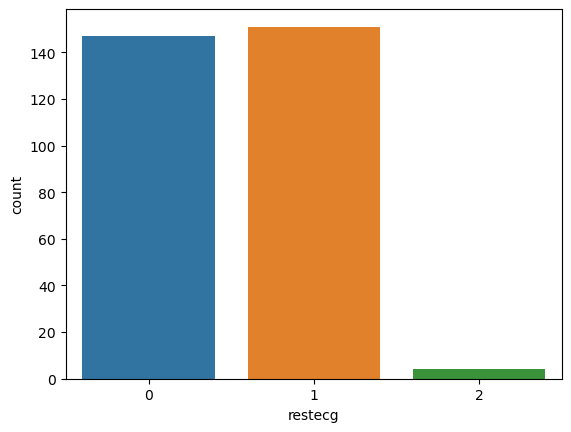

In [14]:
sns.countplot(data['restecg'])

<AxesSubplot:xlabel='exang', ylabel='count'>

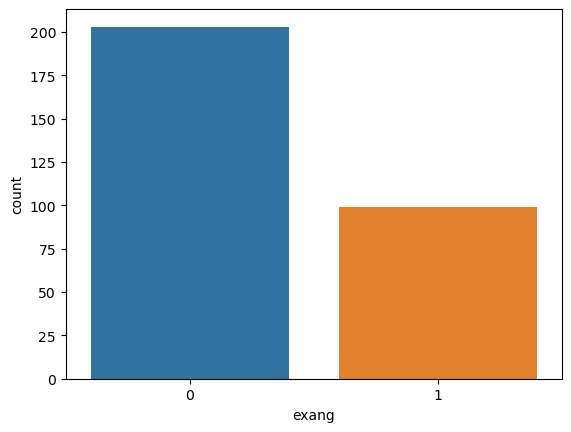

In [15]:
sns.countplot(data['exang'])

<AxesSubplot:xlabel='slope', ylabel='count'>

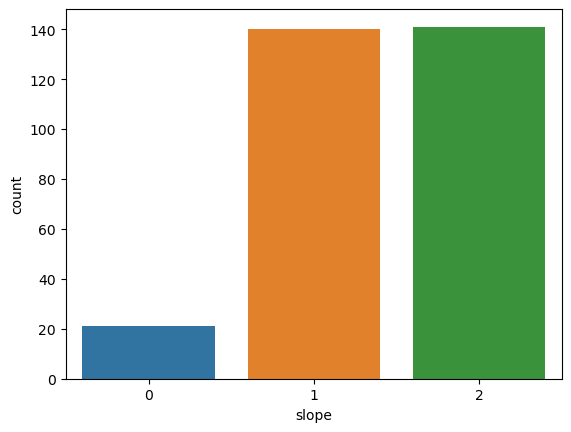

In [16]:
sns.countplot(data['slope'])

<AxesSubplot:xlabel='ca', ylabel='count'>

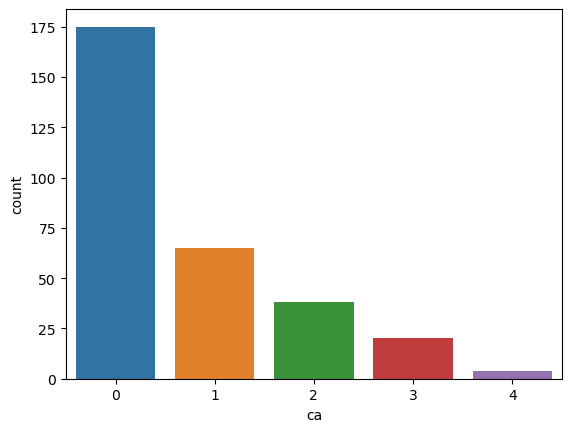

In [17]:
sns.countplot(data['ca'])

<AxesSubplot:xlabel='thal', ylabel='count'>

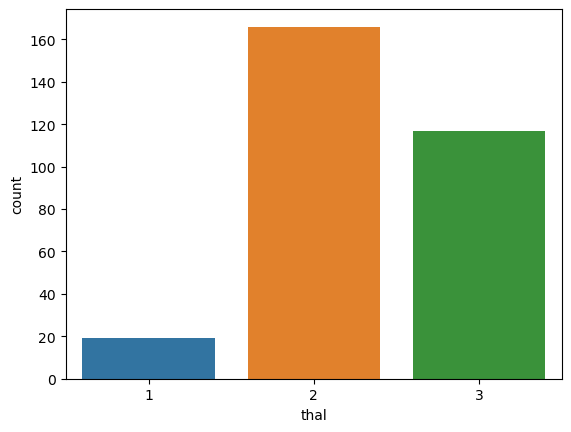

In [18]:
sns.countplot(data['thal'])

<AxesSubplot:xlabel='target', ylabel='count'>

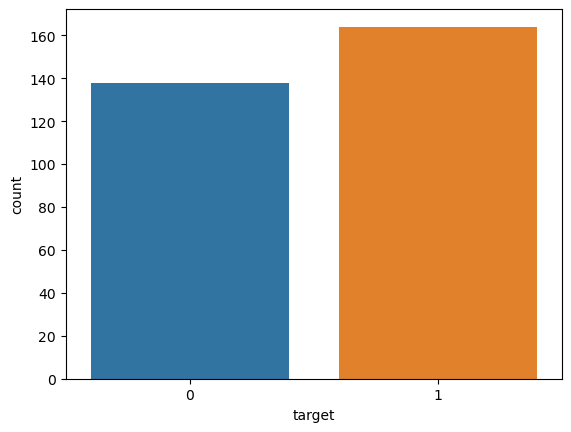

In [19]:
sns.countplot(data['target'])

#### Study the occurrence of CVD across different ages.

In [20]:
data.groupby([pd.cut(data['age'],5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
"(28.952, 38.6]",11.0,0.727273,0.467099,0.0,0.5,1.0,1.0,1.0
"(38.6, 48.2]",71.0,0.704225,0.459639,0.0,0.0,1.0,1.0,1.0
"(48.2, 57.8]",97.0,0.577320,0.496552,0.0,0.0,1.0,1.0,1.0
"(57.8, 67.4]",106.0,0.377358,0.487029,0.0,0.0,0.0,1.0,1.0
"(67.4, 77.0]",17.0,0.588235,0.507300,0.0,0.0,1.0,1.0,1.0


#### Can we detect heart attack based on anomalies in resting blood pressure of the patient?

In [21]:
data.groupby([pd.cut(data['trestbps'],5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
trestbps,,,,,,,,
"(93.894, 115.2]",52.0,0.615385,0.491251,0.0,0.0,1.0,1.0,1.0
"(115.2, 136.4]",141.0,0.560284,0.498122,0.0,0.0,1.0,1.0,1.0
"(136.4, 157.6]",83.0,0.530120,0.502126,0.0,0.0,1.0,1.0,1.0
"(157.6, 178.8]",21.0,0.380952,0.497613,0.0,0.0,0.0,1.0,1.0
"(178.8, 200.0]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


#### Study the composition of overall patients w.r.t . gender.

In [22]:
data.groupby(['sex'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,96.0,0.750000,0.435286,0.0,0.75,1.0,1.0,1.0
1,206.0,0.446602,0.498352,0.0,0.00,0.0,1.0,1.0


#### Describe the relationship between cholesterol levels and our target variable.

In [23]:
data.groupby([pd.cut(data['chol'],5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
chol,,,,,,,,
"(125.562, 213.6]",84.0,0.607143,0.491319,0.0,0.0,1.0,1.0,1.0
"(213.6, 301.2]",175.0,0.514286,0.501230,0.0,0.0,1.0,1.0,1.0
"(301.2, 388.8]",38.0,0.526316,0.506009,0.0,0.0,1.0,1.0,1.0
"(388.8, 476.4]",4.0,0.500000,0.577350,0.0,0.0,0.5,1.0,1.0
"(476.4, 564.0]",1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


#### What can be concluded about the relationship between peak exercising and occurrence of heart attack?

In [24]:
data.groupby(['slope'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
0,21.0,0.428571,0.507093,0.0,0.0,0.0,1.0,1.0
1,140.0,0.350000,0.478682,0.0,0.0,0.0,1.0,1.0
2,141.0,0.751773,0.433524,0.0,1.0,1.0,1.0,1.0


#### Is thalassemia a major cause of CVD?

In [25]:
data.groupby([pd.cut(data['thalach'],5)])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
thalach,,,,,,,,
"(70.869, 97.2]",7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
"(97.2, 123.4]",37.0,0.297297,0.463373,0.0,0.0,0.0,1.0,1.0
"(123.4, 149.6]",88.0,0.352273,0.480416,0.0,0.0,0.0,1.0,1.0
"(149.6, 175.8]",139.0,0.676259,0.469595,0.0,0.0,1.0,1.0,1.0
"(175.8, 202.0]",31.0,0.870968,0.340777,0.0,1.0,1.0,1.0,1.0


#### Use a pair plot to understand the relationship between all the given variables.

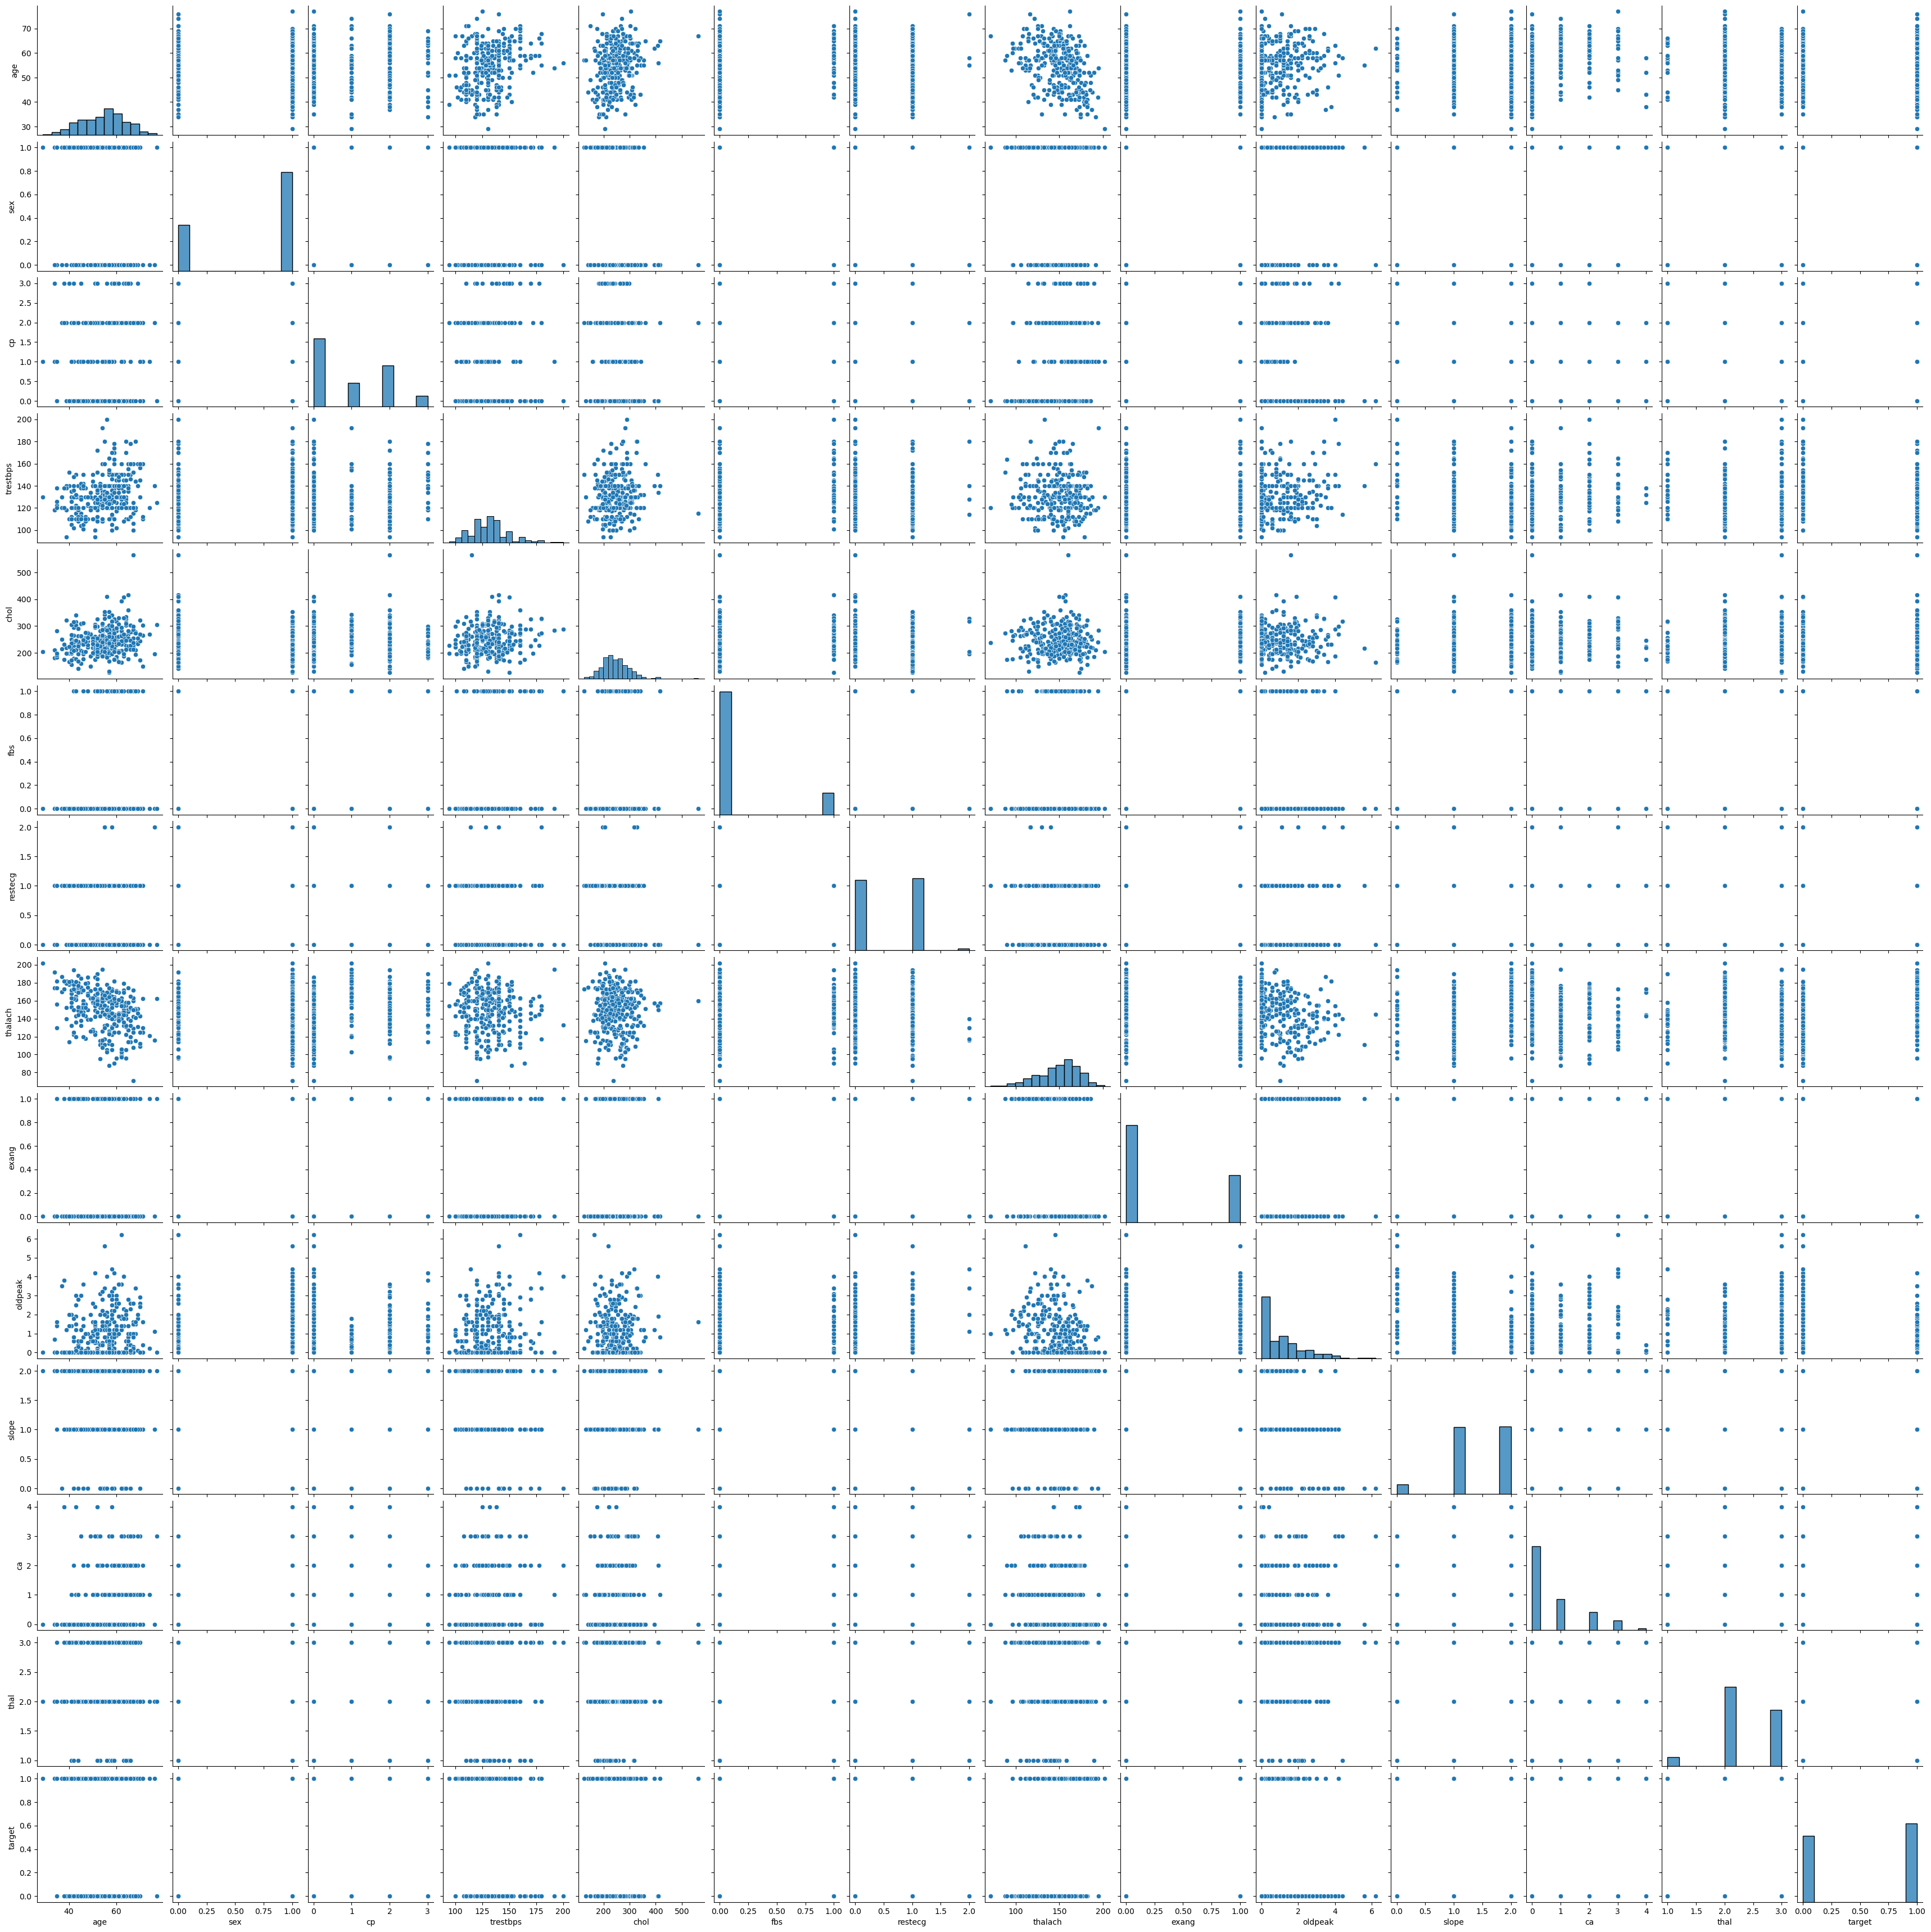

In [26]:
sns.pairplot(data)